In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor


In [3]:
df = pd.read_csv('housing_prices.csv')
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


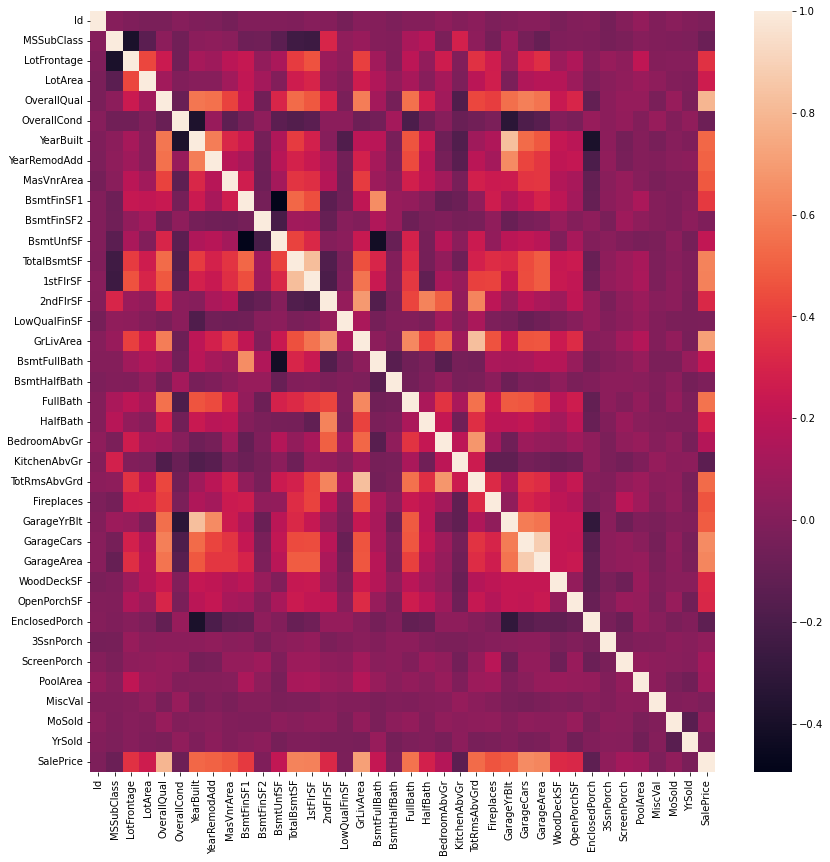

In [365]:
import seaborn as sn
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize=(14,14))
sn.heatmap(df.corr());

In [366]:
corr = df.corr()
corr_values = corr.unstack()
corr_values = corr_values.loc[corr_values!=1]
corr_values.sort_values(ascending=False)


GarageCars    GarageArea       0.882475
GarageArea    GarageCars       0.882475
YearBuilt     GarageYrBlt      0.825667
GarageYrBlt   YearBuilt        0.825667
GrLivArea     TotRmsAbvGrd     0.825489
                                 ...   
YearBuilt     EnclosedPorch   -0.387268
BsmtFullBath  BsmtUnfSF       -0.422900
BsmtUnfSF     BsmtFullBath    -0.422900
              BsmtFinSF1      -0.495251
BsmtFinSF1    BsmtUnfSF       -0.495251
Length: 1406, dtype: float64

In [367]:
def drop_corr_feat(df):
    # Create correlation matrix
    corr_matrix = df.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    # Drop features 
    df=df.drop(columns=to_drop, axis=1)
    return df
df_2 = drop_corr_feat(df)


In [368]:
display(df_2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [369]:
transformer = FunctionTransformer(drop_corr_feat(df))

In [370]:
y = df_2.pop('SalePrice')
X = df_2

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = X_train.select_dtypes(include="number").columns

cat_cols = X_train.select_dtypes(exclude="number").columns

cat_data =  X_train.select_dtypes(exclude="number")

In [372]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"))

cat_pipe = make_pipeline(OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))

ordinal_cols = [
                 ]   
                 

onehot_cols = ["MSZoning", 
                "Condition1", 
                "Heating", 
                "Street", 
                "CentralAir",
               "BsmtExposure",
               "BsmtFinType1",
                "BsmtQual", 
                "BsmtCond",
                "KitchenQual", 
                "FireplaceQu",
                "ExterCond",
                "ExterQual",
                "Foundation"]

house_cat = ["UNK","NA", "Po", "Fa", "TA", "Gd", "Ex"]

base_cat = ["UNK","NA","No", "Mn", "Av", "Gd"]

base_rat = ["UNK",'NA','Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ','GLQ']  
       
cats_ord = [house_cat]           
     
categorical_transformer_ordinal = OrdinalEncoder(categories=cats_ord)
categorical_transformer_onehot = OneHotEncoder(handle_unknown="ignore", drop='first', sparse=False,)

In [373]:
ordinal_col_index=cat_data.columns.get_indexer(ordinal_cols)
onehot_col_index=cat_data.columns.get_indexer(onehot_cols)

In [374]:
categorical_preprocessor = ColumnTransformer(
    transformers=[
        ("cat_ordinal", categorical_transformer_ordinal, ordinal_col_index),
        ("cat_onehot", categorical_transformer_onehot, onehot_col_index),
    ]
)

In [375]:
cat_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="UNK"),
                                 categorical_preprocessor
                                )


In [376]:
full_preprocessing = ColumnTransformer(
    transformers=[
        ("numeric_pipe", num_pipe, num_cols),
        ("categoric_pipe", cat_pipe, cat_cols),
    ]
)

In [377]:
selector = SelectFromModel(GradientBoostingRegressor(), threshold=None)
pca = PCA(n_components=4)

In [378]:
full_pipeline = make_pipeline(
                              full_preprocessing,
                              RobustScaler(),
                              selector,
                              pca,
                              GradientBoostingRegressor()).set_output(transform='pandas')
                              


# define parameter grid
param_grid = {
            "columntransformer__numeric_pipe__simpleimputer__strategy":['mean', 'median'],
             'randomforestregressor__n_estimators': range(84, 86),
             'randomforestregressor__min_samples_split': range(5, 10, 2),
             'randomforestregressor__min_samples_leaf': range(5, 10, 2),
             'randomforestregressor__max_depth':[None]
}

boosti_param_grid = {
            'gradientboostingregressor__n_estimators': [300],
            'gradientboostingregressor__learning_rate': [ 0.1],
            'gradientboostingregressor__max_depth': [2, 3],
            'gradientboostingregressor__min_samples_split': [ 3, 5],
            'gradientboostingregressor__min_samples_leaf': [ 2, 4]
}





# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      boosti_param_grid,
                      cv=5,
                      verbose=1)


In [379]:
search.fit(X_train, y_train)

search.best_score_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\leoos\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories w

C:\Users\leoos\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sp

0.8562385538927104

In [380]:
search.best_params_

{'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__min_samples_leaf': 2,
 'gradientboostingregressor__min_samples_split': 5,
 'gradientboostingregressor__n_estimators': 300}

In [381]:
pred_train = search.predict(X_train)
pred_test = search.predict(X_test)

In [382]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [383]:
# Evaluate the model using RMSE
train_mae_all = mean_absolute_error(y_train, pred_train)
test_mae_all = mean_absolute_error(y_test, pred_test)

print(f"Improved Model Train MAE: {train_mae_all:.2f}")
print(f"Improved Model Test MAE: {test_mae_all:.2f}")

Improved Model Train MAE: 6507.11
Improved Model Test MAE: 17076.82


In [384]:
import pandas as pd


test_df = pd.read_csv('test.csv')


In [256]:
test_df['SalePrice'] = search.predict(test_df)

C:\Users\leoos\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [257]:
search.predict(test_df)
search.best_score_

C:\Users\leoos\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8575673108378826

In [258]:
print(search.best_score_)

0.8575673108378826


In [260]:
test_df['SalePrice'].value_counts()

117000.892902    2
170028.141949    2
292455.463208    2
185511.560991    2
117335.740666    1
                ..
179935.201945    1
304541.943760    1
147296.652723    1
359950.472933    1
220980.530290    1
Name: SalePrice, Length: 1455, dtype: int64

In [261]:
test_df[['Id', 'SalePrice']].to_csv('leo_kaggle_2.csv', index= None)

In [262]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,sale_price,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,117335.740666,117335.740666
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,164608.643679,164608.643679
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,180464.827262,180464.827262
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,183018.180833,183018.180833
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,196323.926652,196323.926652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,85478.087694,85478.087694
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,90198.766582,90198.766582
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,191488.651237,191488.651237
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,121194.805127,121194.805127
